# <span style = "color:red"> Project 2 :  Ames Housing </span>
---

## Contents:
### Part 2 Preprocessing and Modeling

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Load Data from Part 1](#2.-Load-Data-from-Part-1)
3. [Feature Engineering](#3.-Feature-Engineering)
4. [Checking for Multicollinearity](#4.-Checking-for-Multicollinearity)
5. [Dummy Features](#5.-Dummy-Features)
6. [Model Preparation](#6.-Model-Preparation)
7. [Model Production & Kaggle Submission](#7.-Model-Production-&-Kaggle-Submission)
8. [Conclusion](#8.-Conclusion)
9. [Recommendations](#9.-Recommendations)
10. [Limitations & Improvement](#10.-Limitations-&-Improvement)
11. [References](#11.-References)

## Part 2 
Preprocessing and Modeling

---

### 1. Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Display full output 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 2. Load Data from Part 1

In [2]:
# Read in train, test and test_id csv file

train = pd.read_csv('../project_2/datasets/train_clean.csv')
test = pd.read_csv('../project_2/datasets/test_clean.csv')
test_id = pd.read_csv('../project_2/datasets/test_id.csv.')

### 3. Feature Engineering

In [3]:
# Create an interaction column between yr_sold and year_built for train dataset

train['house_age'] = train['yr_sold'] - train['year_built']


# Create an interaction column between yr_sold and year_built for test dataset

test['house_age'] = test['yr_sold'] - test['year_built']

In [4]:
# Create an interaction column between wood_deck_sf, open_porch_sf, total_bsmt_sf, 1st_flr_sf and 2nd_flr_sf for train dataset

train['total_house_sf'] = train['wood_deck_sf'] + train['open_porch_sf'] + train['total_bsmt_sf'] + train['1st_flr_sf'] + train['2nd_flr_sf']


# Create an interaction column between yr_sold and year_built wood_deck_sf, open_porch_sf, total_bsmt_sf, 1st_flr_sf and 2nd_flr_sf for test dataset

test['total_house_sf'] = test['wood_deck_sf'] + test['open_porch_sf'] + test['total_bsmt_sf'] + test['1st_flr_sf'] + test['2nd_flr_sf']


In [5]:
# Create an interaction column between full_bath, half_bath, bsmt_full_bath and bsmt_half_bath for train dataset

train['total_bath'] = train['full_bath'] + train['half_bath'] + train['bsmt_full_bath'] + train['bsmt_half_bath']


# Create an interaction column between full_bath, half_bath, bsmt_full_bath and bsmt_half_bath for test dataset

test['total_bath'] = test['full_bath'] + test['half_bath'] + test['bsmt_full_bath'] + test['bsmt_half_bath']

In [6]:
# Drop any columns that used to make the new interaction feature as this can cause data leakage from train dataset

train.drop(columns = ['yr_sold', 'year_built', 'wood_deck_sf',
                      'open_porch_sf', 'total_bsmt_sf',
                      '1st_flr_sf', '2nd_flr_sf', 'full_bath',
                      'half_bath', 'bsmt_full_bath', 'bsmt_half_bath'], inplace = True)


# Drop any columns that used to make the new interaction feature from test dataset 

test.drop(columns = ['yr_sold', 'year_built', 'wood_deck_sf',
                     'open_porch_sf', 'total_bsmt_sf',
                     '1st_flr_sf', '2nd_flr_sf', 'full_bath',
                     'half_bath', 'bsmt_full_bath', 'bsmt_half_bath'], inplace = True)


### 4. Checking for Multicollinearity

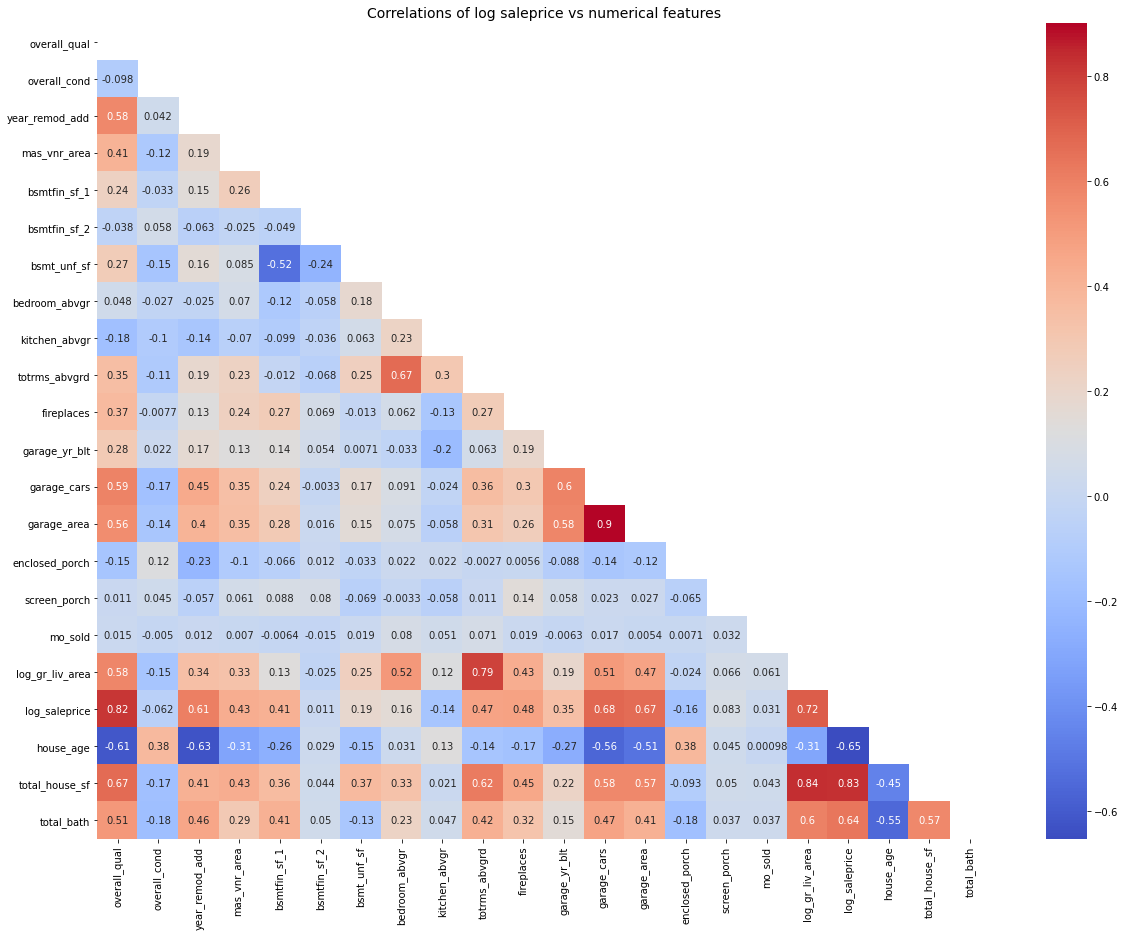

In [7]:
# Plot heatmap using seaborn to visualize correlations between log_saleprice vs all numerical features

# Set the plot figure size
plt.figure(figsize = (20,15))

# Find the pairwise correlation of all columns in dataframe
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)        
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap = 'coolwarm',  annot = True)

# Set the heatmap title
plt.title('Correlations of log saleprice vs numerical features', fontsize = 14)     
plt.show()

- <b>log_saleprice</b> seems to be correlated with <b>house_age, total_house_sf, total_bath, overall_qual, log_gr_liv_area, garage_cars and garage_area</b> the most.
- <b>garage_cars</b> and <b>garage_area</b> seems to be highly correlated with each other. Also, <b>garage_area</b> has slightly lower correlation with <b>log_saleprice</b> compared to <b>garage_cars</b>. So, <b>garage_area</b> can be dropped to remove multicollinearity which will affect our model accuracy. 
- <b>garage_cars</b> and <b>garage_yr_blt</b> seems to be highly correlated with each other. Also, <b>garage_yr_blt</b> has a low correlation with <b>log_saleprice</b> compared to <b>garage_cars</b>. So, <b>garage_yr_blt</b> can be dropped to remove multicollinearity which will affect our model accuracy. 
- <b>log_gr_liv_area</b> and <b>total_house_sf</b> seems to be highly correlated with each other. Also, <b>log_gr_liv_area</b> has a lower correlation with <b>log_saleprice</b> compared to <b>total_house_sf</b>. So, <b>log_gr_liv_area</b> can be dropped to remove multicollinearity which will affect our model accuracy. 
- <b>log_gr_liv_area</b> and <b>totrms_abvgrd</b> seems to be highly correlated with each other. <b>log_gr_liv_area</b> can be dropped to remove multicollinearity which will affect our model accuracy since <b>log_gr_liv_area</b> also highly correlated with <b>total_house_sf</b>.
- <b>bedroom_abvgr</b> and <b>totrms_abvgrd</b> seems to be highly correlated with each other. So, <b>bedroom_abvgr</b> can be dropped to remove multicollinearity which will affect our model accuracy.
- <b>house_age</b> and <b>year_remod_add</b> seems to be highly correlated with each other. So, <b>year_remod_add</b> can be dropped to remove multicollinearity which will affect our model accuracy. 

In [8]:
# Drop log_gr_liv_area, year_remod_add, bedroom_abvgr, garage_area, and garage_yr_blt column from train dataset

train.drop(columns = ['log_gr_liv_area', 'year_remod_add', 'bedroom_abvgr',
                      'garage_area', 'garage_yr_blt'], inplace=True)

# Drop log_gr_liv_area, year_remod_add, bedroom_abvgr, garage_area, and garage_yr_blt column from test dataset

test.drop(columns = ['log_gr_liv_area', 'year_remod_add', 'bedroom_abvgr',
                      'garage_area', 'garage_yr_blt'], inplace=True)

In [9]:
# Check the shape of train & test dataset

print(train.shape)
print(test.shape)

(1977, 56)
(878, 55)


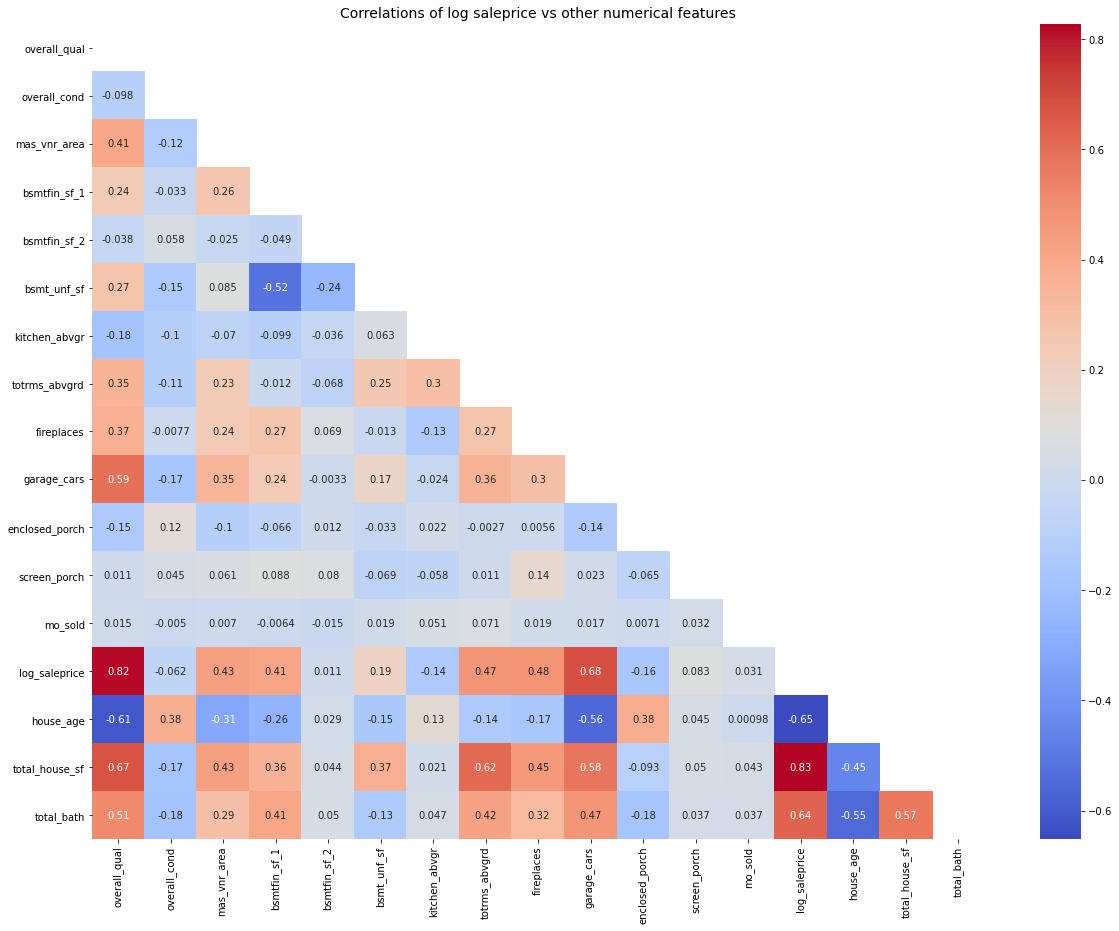

In [10]:
# Plot heatmap using seaborn to visualize correlations between log_saleprice vs remaining numerical features

# Set the plot figure size
plt.figure(figsize = (20,15))

# Find the pairwise correlation of all columns in dataframe
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)        
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap = 'coolwarm',  annot = True)

# Set the heatmap title
plt.title('Correlations of log saleprice vs other numerical features', fontsize = 14)     
plt.show()

- <b>overall_qual</b> is highly correlated with <b>log_saleprice</b> and also few other features. However, we decide not to drop this from data since it is very high correlated with <b>log_saleprice</b>.

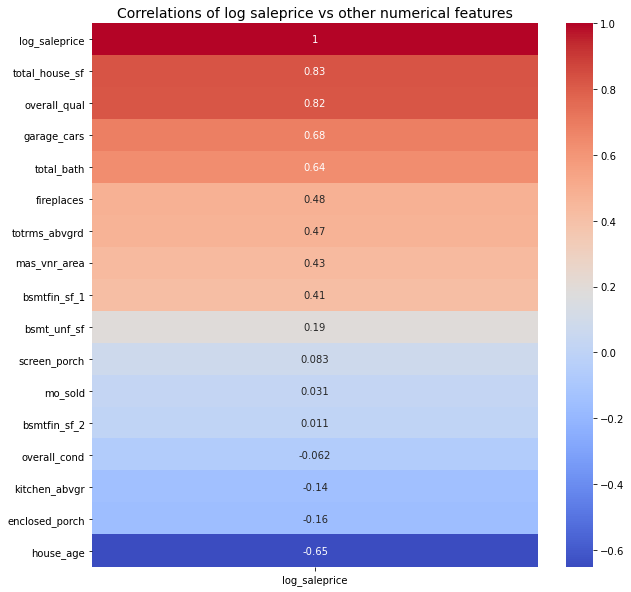

In [11]:
# Plot heatmap using seaborn to visualize correlations between log_saleprice vs all numerical features

# Set the plot figure size
plt.figure(figsize = (10,10))

# Find the pairwise correlation of all columns in dataframe
corr = train.corr()

# Draw the heatmap sorted by log_saleprice
sns.heatmap(corr[['log_saleprice']].sort_values(by='log_saleprice', ascending = False), cmap = 'coolwarm',  annot = True)

# Set the heatmap title
plt.title('Correlations of log saleprice vs other numerical features', fontsize = 14)

plt.show()

### 5. Dummy Features

In [12]:
# Get the list of categorical feature

cat_vars = list(train.dtypes[train.dtypes == 'object'].index)

In [13]:
# Number of categorical feature

len(cat_vars)

39

In [14]:
# Converting train dataset remaining categorical features to dummy feature using one-hot encoding

train = pd.get_dummies(data = train, columns = cat_vars, drop_first = True)

In [15]:
# Check the dummied train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Columns: 229 entries, overall_qual to sale_type_WD 
dtypes: float64(8), int64(9), uint8(212)
memory usage: 672.0 KB


In [16]:
# Converting test dataset remaining categorical features to dummy feature using one-hot encoding

test = pd.get_dummies(data = test, columns = cat_vars, drop_first = True)

In [17]:
# Check the dummied test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 215 entries, overall_qual to sale_type_WD 
dtypes: float64(1), int64(15), uint8(199)
memory usage: 280.5 KB


In [18]:
# Checking for features in training but not in test dataset

[x for x in train if x not in test]

['log_saleprice',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition_2_Feedr',
 'condition_2_PosN',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'roof_matl_Membran',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'bsmt_cond_Fa',
 'bsmt_cond_Po',
 'heating_OthW',
 'heating_Wall',
 'heating_qc_Po',
 'electrical_Mix',
 'functional_Sal',
 'functional_Sev',
 'garage_qual_Fa',
 'misc_feature_TenC']

In [19]:
# Checking for features in test dataset but not in train dataset

[x for x in test if x not in train]

['roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_GasA',
 'kitchen_qual_Po',
 'sale_type_VWD']

In [20]:
# Drop features in training but not in test dataset except saleprice

train.drop(columns = [x for x in train if x not in test if x != 'log_saleprice'], inplace = True)

In [21]:
# Drop features in test but not in train dataset

test.drop(columns = [x for x in test if x not in train], inplace = True)

In [22]:
# Check the shape of train & test dataset

print(train.shape)
print(test.shape)

(1977, 207)
(878, 206)


### 6. Model Preparation

#### 6.1 Train Dataset Split & Scaling

In [23]:
# Create our feature matrix (X) and target vector (y) from train dataset

X = train.drop(columns = 'log_saleprice')
y = train['log_saleprice']

In [24]:
# Perform a split of our X and y 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123)

In [25]:
# Scale our data to standardize different feature magnitudes.

ss = StandardScaler()

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#### 6.2 Linear Regression Model (Baseline Model)

In [26]:
# Instantiate and fit the model.

lr = LinearRegression()

lr.fit(Z_train, y_train)

LinearRegression()

In [27]:
# Evaluate the model using R2 score for train & test data

print('R2 of train set:', round(lr.score(Z_train, y_train),4))
print('R2 of test set:', round(lr.score(Z_test, y_test),4))

R2 of train set: 0.937
R2 of test set: -4004309157731.472


In [28]:
# Get prediction for train & test data

y_preds_train_lr = lr.predict(Z_train)
y_preds_test_lr = lr.predict(Z_test)

In [29]:
# Evaluate the model using RMSE score for train & test data

print('RMSE of train set:', round(np.sqrt(mean_squared_error(y_train, y_preds_train_lr)),5))
print('RMSE of test set:',round(np.sqrt(mean_squared_error(y_test, y_preds_test_lr)),5))

RMSE of train set: 0.09502
RMSE of test set: 795398.54709


- Exponential of sale price will not be used in this case due to a huge value number and causing error.

In [30]:
# Cross Val Score

cross_val_score(lr, Z_train, y_train).mean()

-4.586916386764326e+21

In [31]:
# Look at the top 20 absolute coefficients for features in the Linear Regression Model

linear_coef = pd.DataFrame({'feature' : X_train.columns,
                           'coef' : lr.coef_,
                           'abs_coef': np.abs(lr.coef_)})

linear_coef.sort_values(by = 'abs_coef', inplace = True, ascending = False)

linear_coef.head(20)

,feature,coef,abs_coef
190,garage_cond_No Garage,1.516122e+11,1.516122e+11
150,bsmtfin_type_2_No Basement,-7.257431e+10,7.257431e+10
180,garage_type_No Garage,-6.028999e+10,6.028999e+10
181,garage_finish_No Garage,-5.087066e+10,5.087066e+10
185,garage_qual_No Garage,-4.045150e+10,4.045150e+10
131,bsmt_qual_No Basement,3.943849e+10,3.943849e+10
135,bsmt_cond_No Basement,-3.795679e+10,3.795679e+10
140,bsmt_exposure_No Basement,3.555010e+10,3.555010e+10
144,bsmtfin_type_1_No Basement,3.554252e+10,3.554252e+10
90,exterior_1st_AsphShn,1.769647e+07,1.769647e+07


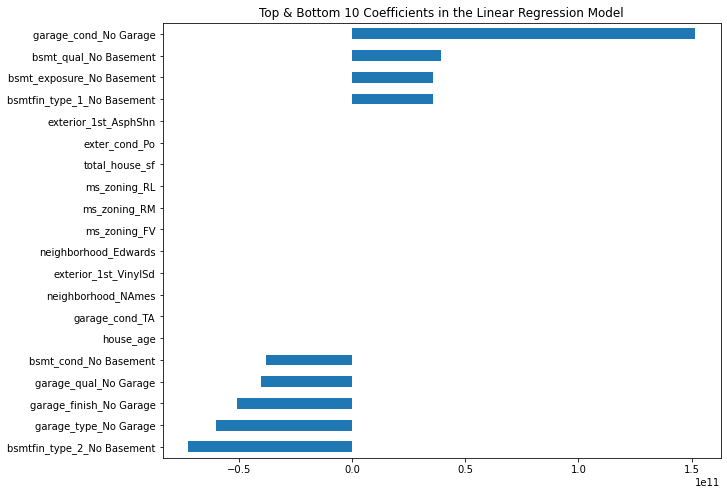

In [32]:
# Plot bar chart of top and bottom 10 coefficients in Linear Regression Model

linear_coef = pd.Series(lr.coef_, index = X_train.columns)

sorted_linear_coef = pd.concat([linear_coef.sort_values().head(10), linear_coef.sort_values().tail(10)])

plt.figure(figsize=(10, 8))
plt.title("Top & Bottom 10 Coefficients in the Linear Regression Model")
sorted_linear_coef.plot(kind = "barh")
plt.show()

In [33]:
# Print percent of feature zeroed out

print("Linear Regression picked " + str(np.sum(lr.coef_ != 0)) + " features and eliminated the other " + str(np.sum(lr.coef_ == 0)) + " features")
print('Percent of feature zeroed out:', np.sum((lr.coef_ == 0))/float(X_train.shape[0])*100)

Linear Regression picked 206 features and eliminated the other 0 features
Percent of feature zeroed out: 0.0


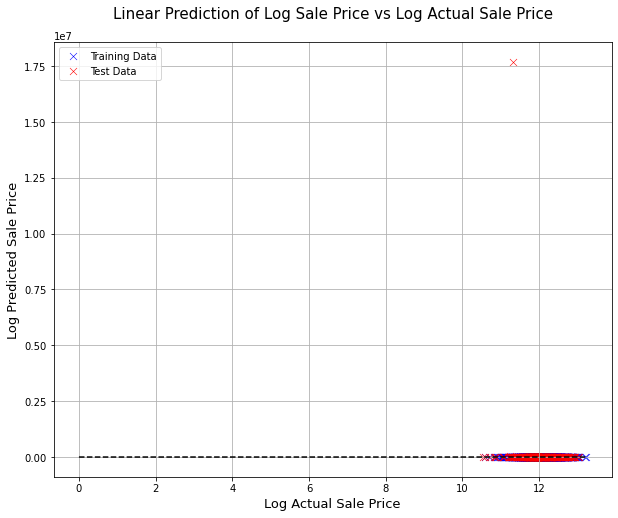

In [34]:
# Create scatterplot to show predicted values versus actual values. 
# Exponential will not be use to avoid infinity value

plt.figure(figsize = (10,8))
sns.scatterplot(x = y_train, y = y_preds_train_lr, marker = 'x', s = 50, color = 'blue', label = 'Training Data')
sns.scatterplot(x = y_test, y = y_preds_test_lr, marker = 'x', s = 50, color = 'red', label = 'Test Data')

# Line showing perfect predictions.
plt.plot([0, max(max(y_train),max(y_preds_train_lr))],
         [0, max(max(y_train),max(y_preds_train_lr))],
         linestyle = '--', color = 'black')

# Set the scatterplot title, legend, x-label & y_label
plt.grid()
plt.xlabel('Log Actual Sale Price', fontsize = 13)
plt.ylabel('Log Predicted Sale Price', fontsize = 13)
plt.legend(loc = "upper left")
plt.title('Linear Prediction of Log Sale Price vs Log Actual Sale Price\n', fontsize = 15)
plt.show()

In [35]:
# Linear model residuals:

lr_resids_train = y_train - y_preds_train_lr
lr_resids_test = y_test - y_preds_test_lr

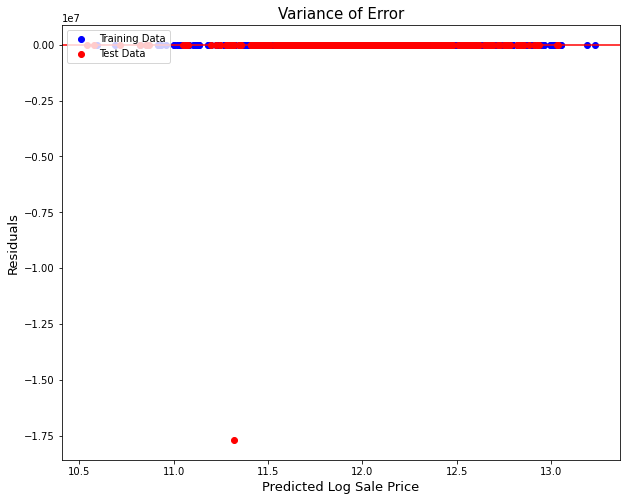

In [36]:
# Plot residuals

plt.figure(figsize = (10,8))
plt.scatter(x = y_train, y = lr_resids_train, color = 'blue', label = 'Training Data')
plt.scatter(x = y_test, y = lr_resids_test, color = 'red', label = 'Test Data')
plt.axhline(y = 0, c = 'red')

# Set the scatterplot title, legend, x-label & y_label
plt.xlabel('Predicted Log Sale Price', fontsize= 13)
plt.ylabel('Residuals', fontsize = 13)
plt.legend(loc = "upper left")
plt.title('Variance of Error', fontsize = 15)
plt.show()

##### Summary
- Based on the above information, I conclude that linear regression model is both overfit to the data and a bad model. Overfitting is a scenario where the model perform well on train data but perform poorly in test data. It memorized the train data instead or learning the relationship betweeen features.
- Based on the R2, our model is explaining approximately zero variance in the test data saleprice but 93.7% of the variability or fluctuation in the train data saleprice can be explained by the predictor features. Our model is overfit and quite bad.
- Based on the RMSE, our model is performing far worse on the test data than on the train data. The RMSE for the train data the model saw is significantly lower than the RMSE for the test data the model has never seen. In machine learning, our model is overfitting, meaning it’s doing a much better job on the data it has seen . The greater the gap between between training error and test error, the greater the overfitting.
- In addition, Test and Cross Val scores are not similar here, so we can conclude this model can not be representative for new future data.
- Also, based on variance of error graph, the error terms do not have equal variance.
- In linear regression overfitting occur when the model is too complex. This usually happen when there are a large number of feature. It performed well in train data but not in test data. 
- Linear regression has no feature selection which is a way to reduce the number of features and hence reduce the computational complexity of the model.
- Regularization is needed to use linear regression in this case. It controls the trade-off between bias and variance.

#### 6.3 Ridge Regression

In [37]:
# Find an optimal value for Ridge regression alpha using RidgeCV 

ridge_alphas = np.logspace(0, 5, 100)

optimal_alpha = RidgeCV(alphas = ridge_alphas, scoring = 'r2', cv = 5).fit(Z_train, y_train)

print("Best alpha :", optimal_alpha.alpha_)

Best alpha : 46.4158883361278


In [38]:
# Instantiate the model with the optimal alpha obtained from cross-validation and Fit.

ridge = Ridge(alpha = optimal_alpha.alpha_)

ridge.fit(Z_train, y_train)

Ridge(alpha=46.4158883361278)

In [39]:
# Evaluate the model using R2 score for train & test data

print('R2 of train set:', round(ridge.score(Z_train, y_train),4))
print('R2 of test set:', round(ridge.score(Z_test, y_test),4))

R2 of train set: 0.9341
R2 of test set: 0.9228


In [40]:
# Get prediction for Z_train & Z_test dataset

y_preds_train_ridge = ridge.predict(Z_train)
y_preds_test_ridge = ridge.predict(Z_test)

In [41]:
# Evaluate the model using RMSE score for train & test data

print(f'RMSE of train set: ${round(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_preds_train_ridge))),2)}')
print(f'RMSE of test set: ${round(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_preds_test_ridge))),2)}')

RMSE of train set: $17526.65
RMSE of test set: $18035.26


In [42]:
# Cross Val Score

cross_val_score(ridge, Z_train, y_train).mean()

0.8998622096862569

In [43]:
# Look at the top 20 absolute coefficients for features in the Ridge

ridge_coef = pd.DataFrame({'feature' : X_train.columns,
                           'coef' : ridge.coef_,
                           'abs_coef': np.abs(ridge.coef_)})

ridge_coef.sort_values(by = 'abs_coef', inplace = True, ascending = False)

ridge_coef.head(20)

,feature,coef,abs_coef
14,total_house_sf,0.111395,0.111395
0,overall_qual,0.057334,0.057334
13,house_age,-0.048295,0.048295
1,overall_cond,0.042818,0.042818
9,garage_cars,0.034829,0.034829
19,ms_zoning_RL,0.027966,0.027966
7,totrms_abvgrd,0.027184,0.027184
164,kitchen_qual_TA,-0.026786,0.026786
3,bsmtfin_sf_1,0.026600,0.026600
62,condition_1_Norm,0.022650,0.022650


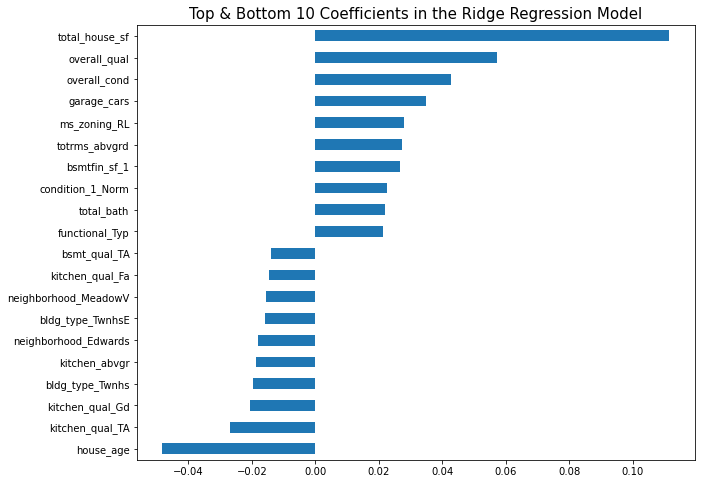

In [44]:
# Plot bar chart of top and bottom 10 coefficients in Ridge Regression Model

ridge_coef = pd.Series(ridge.coef_, index = X_train.columns)

sorted_ridge_coef = pd.concat([ridge_coef.sort_values().head(10), ridge_coef.sort_values().tail(10)])

plt.figure(figsize=(10, 8))
plt.title("Top & Bottom 10 Coefficients in the Ridge Regression Model", fontsize = 15)
sorted_ridge_coef.plot(kind = "barh")
plt.show()

In [45]:
# Print percent of feature zeroed out

print("Ridge Regression picked " + str(np.sum(ridge.coef_ != 0)) + " features and eliminated the other " + str(np.sum(ridge.coef_ == 0)) + " features")
print('Percent of feature zeroed out:', np.sum((ridge.coef_ == 0))/float(X.shape[0])*100)

Ridge Regression picked 204 features and eliminated the other 2 features
Percent of feature zeroed out: 0.10116337885685382


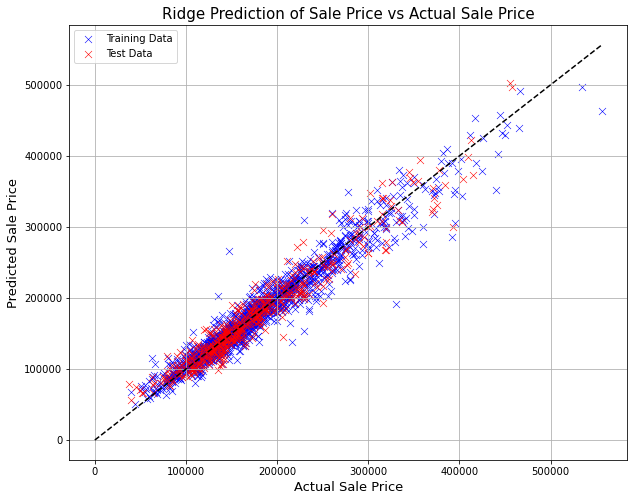

In [46]:
# Create scatterplot to show predicted values versus actual values for train and test data. Exponential will be used to reflect actual saleprice.

plt.figure(figsize = (10,8))
sns.scatterplot(x = np.expm1(y_train), y = np.expm1(y_preds_train_ridge), marker = 'x', s = 50, color = 'blue', label = 'Training Data')
sns.scatterplot(x = np.expm1(y_test), y = np.expm1(y_preds_test_ridge), marker = 'x', s = 50, color = 'red', label = 'Test Data')

# Line showing perfect predictions.
plt.plot([0, max(max(np.expm1(y_train)),max(np.expm1(y_preds_train_ridge)))],
         [0, max(max(np.expm1(y_train)),max(np.expm1(y_preds_train_ridge)))],
         linestyle = '--', color = 'black')

# Set the scatterplot title, legend, x-label & y_label
plt.grid()
plt.xlabel('Actual Sale Price', fontsize = 13)
plt.ylabel('Predicted Sale Price', fontsize = 13)
plt.legend(loc = "upper left")
plt.title('Ridge Prediction of Sale Price vs Actual Sale Price', fontsize = 15)
plt.show()

In [47]:
# Ridge model residuals:

ridge_resids_train = np.expm1(y_train) - np.expm1(y_preds_train_ridge)
ridge_resids_test = np.expm1(y_test) - np.expm1(y_preds_test_ridge)

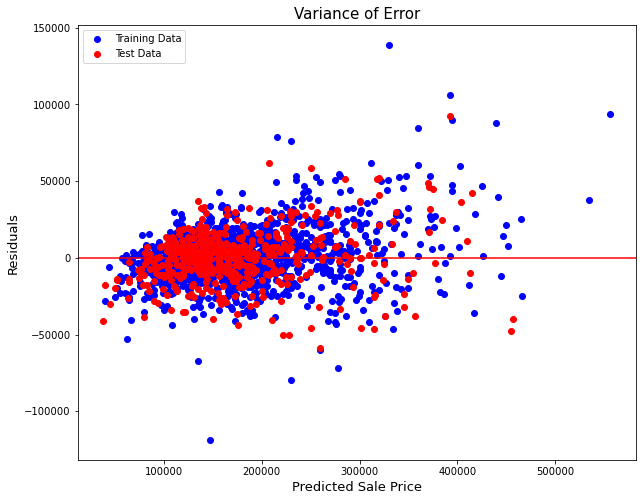

In [48]:
# Plot residuals

plt.figure(figsize = (10,8))
plt.scatter(x = np.expm1(y_train), y = ridge_resids_train, color = 'blue', label = 'Training Data')
plt.scatter(x = np.expm1(y_test), y = ridge_resids_test, color = 'red', label = 'Test Data')
plt.axhline(y = 0, c = 'red')

# Set the scatterplot title, legend, x-label & y_label
plt.xlabel('Predicted Sale Price', fontsize= 13)
plt.ylabel('Residuals', fontsize = 13)
plt.legend(loc = "upper left")
plt.title('Variance of Error', fontsize = 15)
plt.show()

##### Summary
- Based on the above information, I conclude that ridge regression model is slightly overfit to the data but is not a bad model. It's vastly better than the Linear Regression Model. 
- Based on the R2, our model is explaining approximately 92.3% of the variability or fluctuation in the test data saleprice and explaining 93.4% of the variability or fluctuation in the train data saleprice by the predictor features. Our model is quite good.
- Based on the RMSE, our model is much better after added regularization. The very small difference between train & test data indicate that we eliminated most of the overfitting. The graph confirmed the idea.
- In addition, Test and Cross Val scores are similar here, so we can also conclude this model to be representative for new future data.
- Based on variance of error graph, the error terms do seem like have constant variance.
- Ridge regression model uses L2 regularization technique. The advantages of Ridge regression model is it reduces the model complexity by coefficient shrinkage and it shrinks the parameters to prevent multicollinearity.
- However, the magnitude of the coefficients decreases, where the values reaches to zero but not absolute zero. Thus, it used almost all of the predictors in the model.
- Also, ridge model regression trades variance for bias.

#### 6.4 Lasso Regression

In [49]:
##### Find an optimal value for Lasso regression alpha using LassoCV

lasso_alphas = 500

optimal_alpha = LassoCV(n_alphas = lasso_alphas, cv = 5, verbose = 1, random_state = 42).fit(Z_train, y_train)

print("Best alpha :", optimal_alpha.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Best alpha : 0.0022135644732657425


In [50]:
# Instantiate the model with the optimal alpha ontained from cross-validation and Fit.

lasso = Lasso(alpha = optimal_alpha.alpha_)

lasso.fit(Z_train, y_train)

Lasso(alpha=0.0022135644732657425)

In [51]:
# Evaluate the model using R2 score for train & test data

print('R2 of train set:', round(lasso.score(Z_train, y_train),4))
print('R2 of test set:', round(lasso.score(Z_test, y_test),4))

R2 of train set: 0.9275
R2 of test set: 0.9252


In [52]:
# Get prediction for Z_train & Z_test dataset

y_preds_train_lasso = lasso.predict(Z_train)
y_preds_test_lasso = lasso.predict(Z_test)

In [53]:
# Evaluate the model using RMSE score for train & test data

print(f'RMSE of train set: ${round(np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_preds_train_lasso))),2)}')
print(f'RMSE of test set: ${round(np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_preds_test_lasso))),2)}')

RMSE of train set: $18568.22
RMSE of test set: $17762.94


In [54]:
# Cross Val Score

cross_val_score(lasso, Z_train, y_train).mean()

0.9050184964723564

In [55]:
# Look at the top 20 absolute coefficients for features in the Lasso

lasso_coef = pd.DataFrame({'feature' : X_train.columns,
                           'coef' : lasso.coef_,
                           'abs_coef': np.abs(lasso.coef_)})

lasso_coef.sort_values(by = 'abs_coef', inplace = True, ascending = False)

lasso_coef.head(20)

,feature,coef,abs_coef
14,total_house_sf,0.139135,0.139135
0,overall_qual,0.072589,0.072589
13,house_age,-0.062297,0.062297
1,overall_cond,0.046654,0.046654
9,garage_cars,0.034409,0.034409
7,totrms_abvgrd,0.020620,0.020620
41,neighborhood_Crawfor,0.018893,0.018893
15,total_bath,0.018839,0.018839
6,kitchen_abvgr,-0.017230,0.017230
73,bldg_type_Twnhs,-0.017201,0.017201


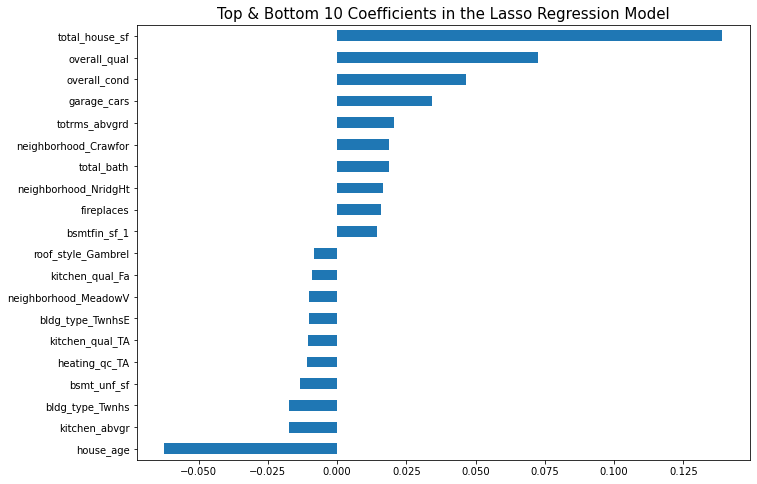

In [56]:
# Plot bar chart of top and bottom 10 coefficients in Lasso Regression Model

lasso_coef = pd.Series(lasso.coef_, index = X_train.columns)

sorted_lasso_coef = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])

plt.figure(figsize=(11, 8))
sorted_lasso_coef.plot(kind = "barh")
plt.title("Top & Bottom 10 Coefficients in the Lasso Regression Model", fontsize = 15)
plt.show()

In [57]:
# Print percent of feature zeroed out

print("Lasso Regression picked " + str(np.sum(lasso.coef_ != 0)) + " features and eliminated the other " + str(np.sum(lasso.coef_ == 0)) + " features")
print('Percent of feature zeroed out:', np.sum((lasso.coef_ == 0))/float(X.shape[0])*100)

Lasso Regression picked 120 features and eliminated the other 86 features
Percent of feature zeroed out: 4.350025290844714


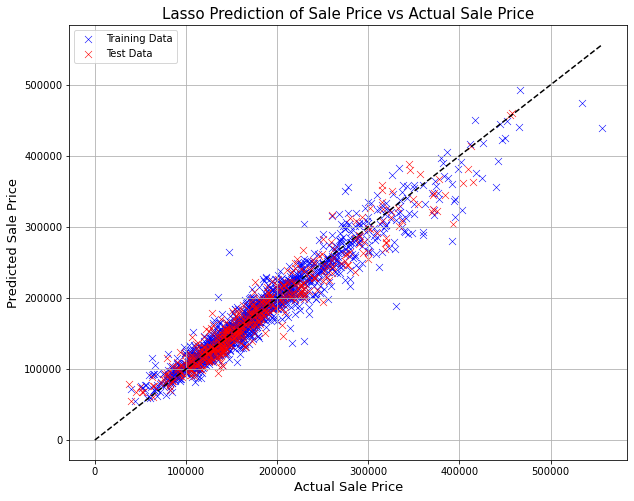

In [58]:
# Create scatterplot to show predicted values versus actual values for train & test data

plt.figure(figsize = (10,8))
sns.scatterplot(x = np.expm1(y_train), y = np.expm1(y_preds_train_lasso), marker = 'x', s = 50, color = 'blue', label = 'Training Data')
sns.scatterplot(x = np.expm1(y_test), y = np.expm1(y_preds_test_lasso), marker = 'x', s = 50, color = 'red', label = 'Test Data')

# Line showing perfect predictions.
plt.plot([0, max(max(np.expm1(y_train)),max(np.expm1(y_preds_train_lasso)))],
         [0, max(max(np.expm1(y_train)),max(np.expm1(y_preds_train_lasso)))],
         linestyle = '--', color = 'black')

# Set the scatterplot title, legend, x-label & y_label
plt.grid()
plt.xlabel('Actual Sale Price', fontsize = 13)
plt.ylabel('Predicted Sale Price', fontsize = 13)
plt.legend(loc = "upper left")
plt.title('Lasso Prediction of Sale Price vs Actual Sale Price', fontsize = 15)
plt.show()

In [59]:
# Lasso model residuals:

lasso_resids_train = np.expm1(y_train) - np.expm1(y_preds_train_lasso)
lasso_resids_test = np.expm1(y_test) - np.expm1(y_preds_test_lasso)

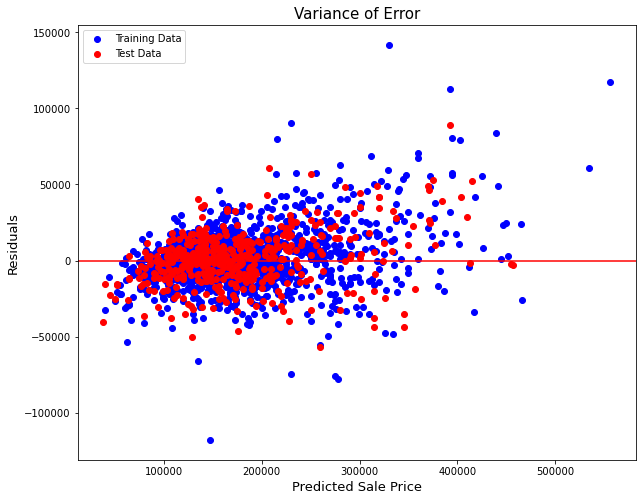

In [60]:
# Plot Residuals

plt.figure(figsize = (10,8))
plt.scatter(x = np.expm1(y_train), y = lasso_resids_train, color = 'blue', label = 'Training Data')
plt.scatter(x = np.expm1(y_test), y = lasso_resids_test, color = 'red', label = 'Test Data')
plt.axhline(y = 0, c = 'red')

# Set the scatterplot title, legend, x-label & y_label
plt.xlabel('Predicted Sale Price', fontsize= 13)
plt.ylabel('Residuals', fontsize = 13)
plt.legend(loc = "upper left")
plt.title('Variance of Error', fontsize = 15)
plt.show()

Linear, Ridge & Lasso Model R2 & RMSE

|Model|Data|R2|RSME|Remarks|
|---|---|---|---|---|
|Linear (Baseline)|Train|0.9370|0.09502|RSME without exponential due to exponential of test RSME cause infinity|
|Linear (Baseline)|Test|-4.0e+12|795,398|RSME without exponential due to exponential of test RSME cause infinity|
|Ridge|Train|0.9341|\\$17,526.65|-|
|Ridge|Test|0.9228|\\$18,035.26|-|
|Lasso|Train|0.9275|\\$18,568.22|-|
|Lasso|Test|0.9252|\\$17,762.94|-|

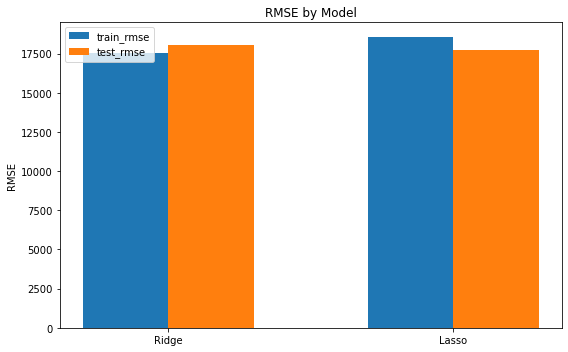

In [61]:
# Plot RSME comparison between Ridge & Lasso Model for Train/Test Data except Linear Model due to overfitting

labels = ['Ridge', 'Lasso']
train_rmse = [np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_preds_train_ridge))), 
              np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_preds_train_lasso)))]

test_rmse = [ np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_preds_test_ridge))), 
             np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_preds_test_lasso)))]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x - width/2, train_rmse, width, label='train_rmse')
ax.bar(x + width/2, test_rmse, width, label='test_rmse')

# Set the y-label, x-axis tick label & title 
ax.set_ylabel('RMSE')
ax.set_title('RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set the legend location
ax.legend(loc = "upper left")

fig.tight_layout()

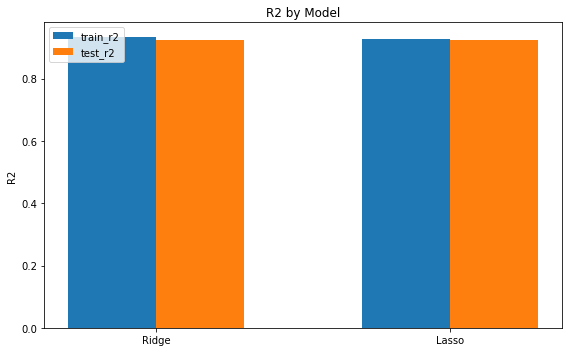

In [62]:
# Plot R2 comparison by Model & Train/Test Data

labels = ['Ridge', 'Lasso']
train_r2 = [ridge.score(Z_train, y_train), lasso.score(Z_train, y_train)]

test_r2 = [ridge.score(Z_test, y_test), lasso.score(Z_test, y_test)]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x - width/2, train_r2, width, label='train_r2')
ax.bar(x + width/2, test_r2, width, label='test_r2')

# Set the y-label, x-axis tick label & title .
ax.set_ylabel('R2')
ax.set_title('R2 by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Set the legend location
ax.legend(loc = "upper left")

fig.tight_layout()

##### Summary
- Based on the above information, I conclude that Lasso Regression Model is lowest overfit to the data and is a good model. It's vastly better than the Linear Regression Model & Ridge Regression Model. 
- Based on the R2, our model is explaining approximately 92.5% of the variability or fluctuation in the test data saleprice and explaining 92.7% of the variability or fluctuation in the train data saleprice by the predictor features. Our model is quite good. Lasso Regression model training error increase(increase bias), test error decrease(decrease variance).
- Based on the RMSE, our model is much better after added regularization. The graph confirmed the idea. The very small difference between train & test data indicate that we eliminated most of the overfitting. Though the difference is larger than Ridge Regression Model. But, in Lasso Regression Model, the test data RSME is even lower than train data.
- In addition, Test and Cross Val scores are similar here, so we can also conclude this model to be representative for new future data.
- Based on variance of error graph, the error terms do seem like have constant variance.
- Lasso regression model uses L1 regularization technique. In contrast to L2 regularization, L1 regularization yields sparse feature vectors, most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant. 
- Based on above information our coefficients are reducing to absolute zeroes. Therefore, Lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge. Feature selection is a way to reduce the number of features and hence reduce the computational complexity of the model. Thus, Lasso used only less than two thirds of the available features. 
- Lasso model will be the best model in predicting the saleprice of this project.

### 7. Model Production & Kaggle Submission

In [63]:
# Scale our entire train dataset to standardize different feature magnitudes.

ss = StandardScaler()

train_ss = ss.fit_transform(X)
test_ss = ss.transform(test)

In [64]:
# Refit Lasso model on entire train dataset

lasso.fit(train_ss, y)

Lasso(alpha=0.0022135644732657425)

In [65]:
# Evaluate the model using R2 score for train dataset

print('R2 of train dataset:', lasso.score(train_ss, y))

R2 of train dataset: 0.9293135218417256


In [66]:
# Get prediction for test dataset

y_preds_test = lasso.predict(test_ss)

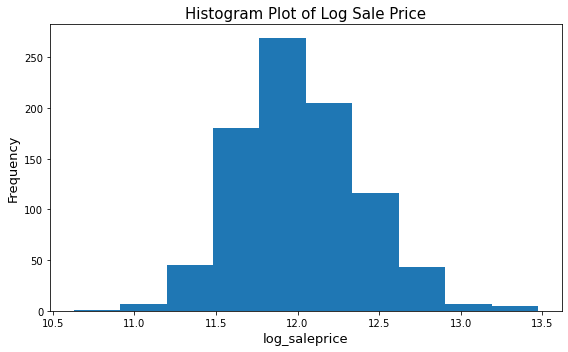

In [67]:
# sanity check - plot histogram of y_preds_test (transformed)

plt.figure(figsize = (8,5))
plt.hist(y_preds_test)
plt.xlabel('log_saleprice', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.title('Histogram Plot of Log Sale Price', fontsize = 15)
plt.tight_layout()

The production model was tuned and fitted with the transformations done to saleprice. These will need to be reversed with the saleprice predicted using the final model.

In [68]:
# Inverse the log transformed saleprice with an exponential function and add the saleprice to test dataset

test['saleprice'] = np.expm1(y_preds_test)

In [69]:
# Adding back the id of each house back to the test dataset

test['id'] = test_id

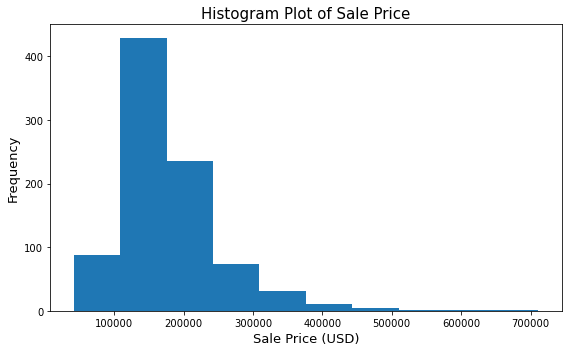

In [70]:
# sanity check - plot histogram of y_preds_test (final)

plt.figure(figsize = (8,5))
plt.hist(test['saleprice'])
plt.xlabel('Sale Price (USD)', fontsize = 13)
plt.ylabel('Frequency', fontsize = 13)
plt.title('Histogram Plot of Sale Price', fontsize = 15)
plt.tight_layout()

In [71]:
# Create csv for submission
submission = test[['id','saleprice']]
submission.to_csv('../project_2/datasets/kaggle_submission.csv', index = False)

#View submission
submission.head()

,id,saleprice
0,2658,103139.739615
1,2718,163041.151911
2,2414,211785.495165
3,1989,105607.433260
4,625,181129.304077


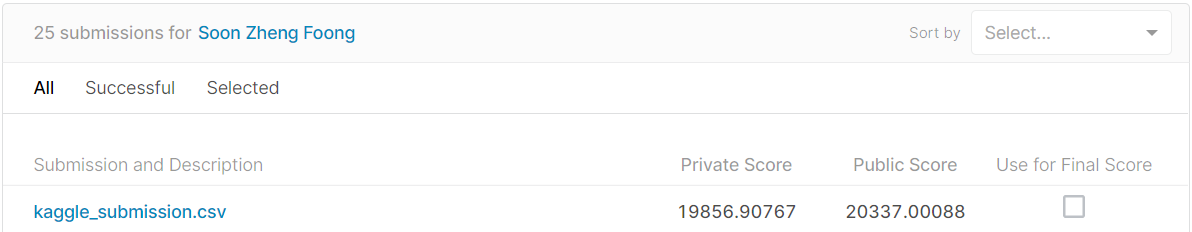

In [72]:
# Find the average selling price

print(f"The average house sale price is ${round(np.mean(test['saleprice']),2)}")

The average house sale price is $177633.33


### 8. Conclusion

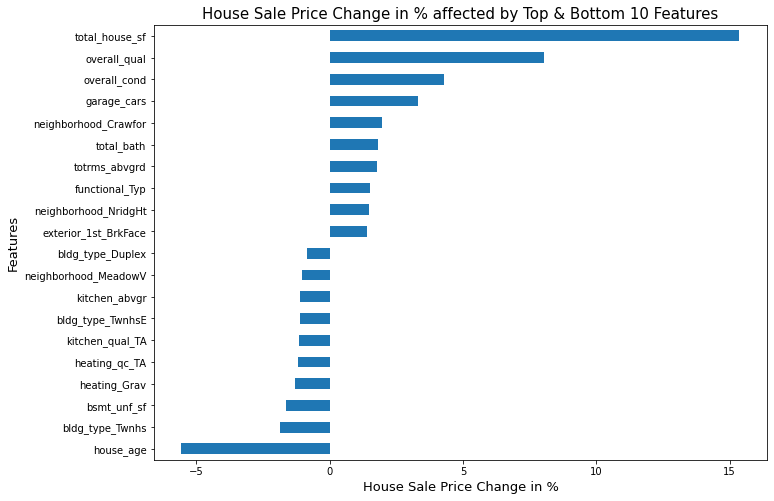

,feature,price_change_percent
14,total_house_sf,15.371748
0,overall_qual,8.032319
1,overall_cond,4.294378
9,garage_cars,3.330422
41,neighborhood_Crawfor,1.972069
15,total_bath,1.820367
7,totrms_abvgrd,1.773536
169,functional_Typ,1.497523
52,neighborhood_NridgHt,1.462876
92,exterior_1st_BrkFace,1.392256


In [73]:
# Plot bar chart of house price change in % affected by top & bottom 10 features in Lasso Regression Model
# Only the response variable is log-transformed. Exponentiate the coefficient, subtract one from this number, and multiply by 100
# This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable

lasso_coef = pd.Series(((np.exp(lasso.coef_)-1)*100), index = X_train.columns)

sorted_lasso_coef = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])

plt.figure(figsize=(11, 8))
sorted_lasso_coef.plot(kind = "barh")
plt.title("House Sale Price Change in % affected by Top & Bottom 10 Features", fontsize = 15)
plt.xlabel("House Sale Price Change in %", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.show()

# Look at the top & bottom 10 features percent change in house price in Lasso Regression Model

lasso_coef = pd.DataFrame({'feature' : X_train.columns,
                           'price_change_percent' : ((np.exp(lasso.coef_)-1)*100)})

sorted_lasso_coef = pd.concat([lasso_coef.sort_values(by = 'price_change_percent', ascending = False).head(10), lasso_coef.sort_values(by = 'price_change_percent', ascending = False).tail(10)])

sorted_lasso_coef

1. Linear regression is the most basic form, where the model is not penalized for its choice of weights, at all. That means, during the training stage, if the model feels like one particular feature is particularly important, the model may place a large weight to the feature. These models tend to overfitting. Hence, Regularization is needed. Regularization is an important concept that is used to avoid overfitting of the data, especially when the trained and test data are much varying.

2. Ridge Regression is a regularizaton technique that includes an L2 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task. Therefore, it prevent multicollinearity and reduces the model complexity by coefficient shrinkage.
    - <p>Limitation of Ridge Regression: It shrinks coefficients towards zero but not absolute, thus it includes almost all the predictors and not capable of performing feature selection. Also, it trades variance for bias.</p>
   
3. Lasso Regression is a regularization technique which is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting. In addition, Lasso Regression selects only some feature while reduces the coefficients of others to zero by imposing a constraint on the model parameters. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Thus, in this project, Lasso Regression picked 120 features and eliminated the other 86 features. This property is known as feature selection and which is absent in case of linear & ridge regression.
    - <p>Limitation of Lasso Regression: Lasso sometimes struggles with some types of data. If the number of predictors is greater than the number of observations, Lasso will pick at most n predictors as non-zero, even if all predictors are relevant. Also, if there are two or more highly collinear variables then Lasso regression select one of them randomly which is not good for the interpretation of data</p>
    
4. In this project, Lasso Regression model had the best predictive performance on housing sale price in Ames, Iowa, and outperformed the other linear model tested (Linear & Ridge Regression) based on two metrics comparison (RMSE & R2). Lasso Model able to explain approximately 92.5% of the variability or fluctuation in the sample test data sale price by the predictor features. Also, Lasso Model able to predict the house sample test data sale price with only \$17,762.94 root mean square error (RMSE).

5. Based on finding above, total house square feet, overall quality & overall condition are the top 3 features which parts of the house to improve to raise the house sale price. e.g:
    - Holding all else constant, for every one-unit increase in the house square feet (1 square feet), house sale price increases by about 15.3%. E.g : An average house sale price in Ames, Iowa is \\$177,633.33. Thus, increase house square feet by one square feet the house sale price increase by $27,178. This number is pretty high, which makes it easy for our model to become overfit, as even a slight increase in total house square feet will lead to a much larger shift as compared to a unit change for any of our other features.
    - Holding all else constant, for every one-unit increase in the house overall quality (Rates of overall material and finish of the house), house sale price increases by about 8%. Thus, increase the rates of overall material and finish of the house by 1 score the house sale price increase by \$14,210.
    - Holding all else constant, for every one-unit increase in the house overall condition (Rates the overall condition of the house), house sale price increases by about 4.3%. Thus, increase the rates of overall condition of the house by 1 score the house sale price increase by \$7,638.    

6. Based on finding above, house age, townhouse inside unit and unfinished square feet of basement area the top 3 features that will lead to a decrease in the house sale price. e.g:
    - Holding all else constant, for every one-unit increase in the house age (1 year), house sale price decreases by about 5.5%. Thus, increase the house age by 1 year the house sale price decrease by \$9,770.
    - Holding all else constant, the effect of it being townhouse inside unit, house sale price decreases by about 1.86% (\$3,304).
    - Holding all else constant, for every one-unit increase in the house unfinished square feet of basement area (1 square feet), house sale price decreases by about 1.63%. Thus, increase the house unfinished square feet of basement area the house sale price decrease by \$2,895.

### 9. Recommendations

Based on our model, as a real estate firm looking to increase the selling price of the house could do the following:

1. Increase the overall material and finish quality of the house through renovation and painting.
2. Improve the house overall condition through cleaning, renovate the garage if it is in bad condition and etc.
3. Increase garage size to allow it to fit more than one car.
4. Increase the number of bathrooms in the house, or renovate existing bedroom to add additional bathroom (if the house has more than four bedrooms).
5. Switch to a brick exterior if using a hardboard or stucco exterior.
6. Avoid holding the house for too long, as prices for all house types decreased with age.
7. Finishing an unfinished  basement as a finished basement will add significant value to your property. Also, it will create additional living space.

### 10. Limitations & Improvement 

As the model was developed using data on houses sold between 2006 - 2010 in Ames, USA, it may have limited applicabilities.

1. The model only accounted for 92.5% of the variations in sample test data sale price. The remaining 7.5% could be due to factors related to area desirability (i.e. location). In the current dataset, only neighborhoods and proximity to roads are included under this category. In reality, factors such as the presence of schools, hospitals and malls are some examples of other factors that are also likely to affect house price.

2. In addition, it captures only a small time frame of four years. This is not enough to capture any annual patterns in sale price that could arise as a result of external factors, such as policy changes. This model also doesn't take into account the inflation of housing prices. Since the end of the financial crisis in 2008, housing prices throughout the US have been increasing steadily year over year. Our model would need significant retraining to predict the current house prices in Ames today.

3. The model is specific to houses in Ames and may not be as accurate when applied to data from another city given that each city tends to differ greatly in terms of external factors like geographical features, seasonal weather or the economic climate of that particular city.


Therefore, to improve the applicability and accuracy of the model to predict today price consider adding the following:

1. A wider time frame
2. Different locations & seasonal weather
3. Availability of facilities nearby

### 11. References

1. https://www.globalpropertyguide.com/North-America/United-States/Price-History
2. https://walletinvestor.com/real-estate-forecast/ia/story/ames-housing-market
3. https://data.census.gov/cedsci/table?q=DP04&tid=ACSDP5Y2019.DP04
4. https://www.statista.com/statistics/200445/reported-violent-crime-rate-in-the-us-states/
5. https://www.amestrib.com/story/news/2020/10/16/ames-ranked-top-15-places-live/3678012001/
6. https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/